<a href="https://colab.research.google.com/github/nestorm94/Aprendizaje_Maquinas/blob/main/taller_reg_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


Parte 1



*   Encontrar una línea 1 que pase por los puntos
*   Encontrar una línea 2 que pase por los puntos
*   Dibujarlas en el scatter
*   Determinar cuál tiene mejor mse
*   Encontrar un árbol  regresor de altura 3
*   Encontrar un árbol  regresor sin  altura max
*   KNN regressor con k = 2
*   KNN regressor con k = 3
*   encontrar el mse para cada modelo
*   dibujar x vs y para cada modelo sobre el scatter




In [37]:
np.random.seed(123)
x = np.arange(0, 5, 0.1)
y = 3 * x  +  2  + np.random.normal(0, 4, len(x))

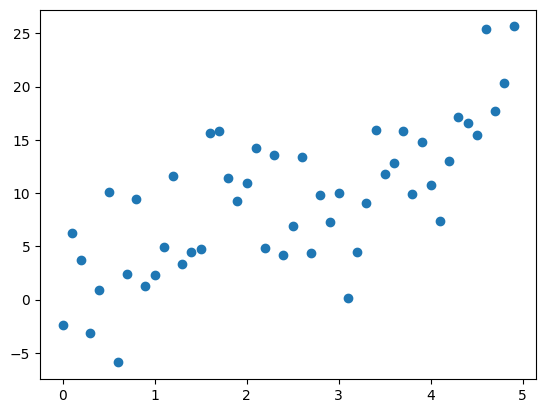

In [38]:
plt.scatter(x, y)

9.513786823587738


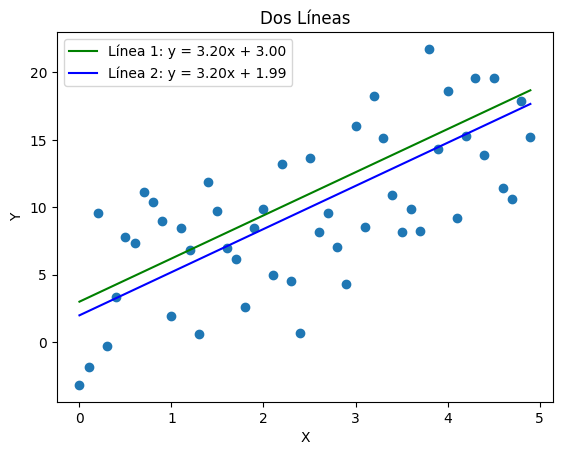

In [39]:

#linea 1
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))

pendiente1 = 3.2
intercepto1 = 3

linea1 = pendiente1 * x + intercepto1

#linea 2
x1 = np.arange(0, 5, 0.1)
y1 = 3 * x1 + 2 + np.random.normal(0, 4, len(x1))

pendiente2 = 3.2
intercepto2 = np.mean(y1) - pendiente2 * np.mean(x1)
linea2 = pendiente2 * x1 + intercepto2

a = np.mean(y)
print(a)

plt.scatter(x, y)
plt.plot(x, linea1, color='green', label=f'Línea 1: y = {pendiente1:.2f}x + {intercepto1:.2f}')
plt.plot(x1, linea2, color='blue', label=f'Línea 2: y = {pendiente2:.2f}x + {intercepto2:.2f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dos Líneas')
plt.show()


In [40]:
#errores MSE
mse1 = np.mean((linea1 - y) ** 2)
mse2 = np.mean((linea2 - y1) ** 2)

print("MSE para la Línea 1:", mse1)
print("MSE para la Línea 2:", mse2)

MSE para la Línea 1: 20.221056407310257
MSE para la Línea 2: 16.024156785758517


Parte II

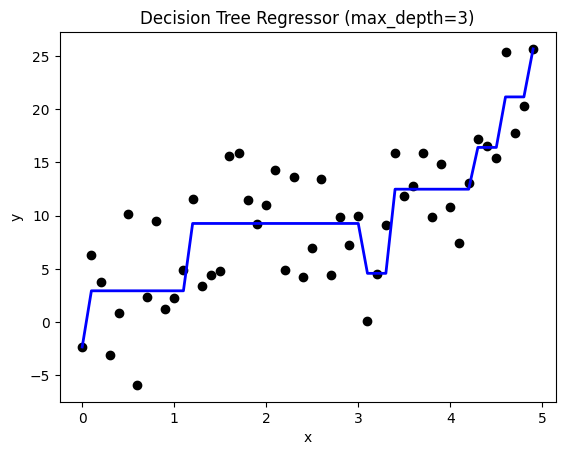

In [54]:
np.random.seed(123)
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))
regressor = DecisionTreeRegressor(max_depth=3)
X = x.reshape(-1, 1)
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree Regressor (max_depth=3)')
plt.show()

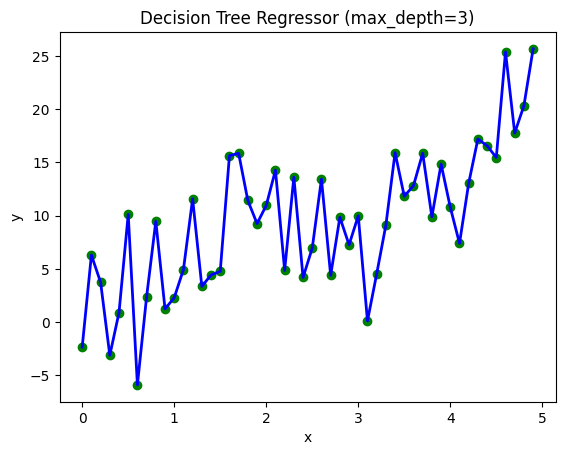

In [55]:
regressor = DecisionTreeRegressor()
X = x.reshape(-1, 1)
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(x, y, color='green')
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree Regressor (max_depth=3)')
plt.show()

MSE para la Línea KNN=2: 8.505886356638761
MSE para la Línea KNN=3: 12.88597891336178


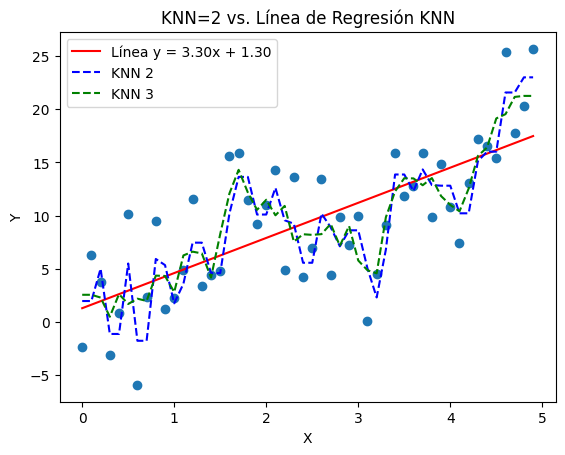

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(123)
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))

lineaK = 3.3 * x + 1.3

knn2 = KNeighborsRegressor(n_neighbors=2)
knn3 = KNeighborsRegressor(n_neighbors=3)
knn2.fit(x.reshape(-1, 1), y)
knn3.fit(x.reshape(-1, 1), y)

y_pred_KNN2 = knn2.predict(x.reshape(-1, 1))
y_pred_KNN3 = knn3.predict(x.reshape(-1, 1))

mse_KNN2 = np.mean((y_pred_KNN2 - y) ** 2)
mse_KNN3 = np.mean((y_pred_KNN3 - y) ** 2)

print("MSE para la Línea KNN=2:", mse_KNN2)
print("MSE para la Línea KNN=3:", mse_KNN3)

plt.scatter(x, y)
plt.plot(x, lineaK, color='red', label=f'Línea y = {3.3:.2f}x + {1.3:.2f}')
plt.plot(x, y_pred_KNN2, color='blue', label='KNN 2', linestyle='--')
plt.plot(x, y_pred_KNN3, color='green', label='KNN 3', linestyle='--')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN=2 vs. Línea de Regresión KNN')
plt.show()

taller 13 de septiembre

Mejor pendiente: 2.80
Mejor valor de b: 1.90
Mejor error: 13.14


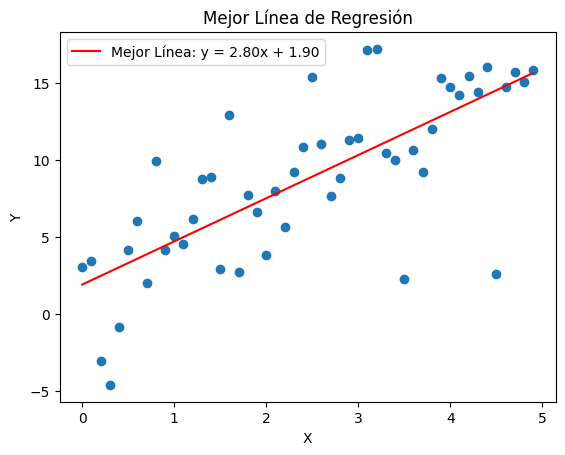

In [41]:
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))

mejor_pendiente = None
mejor_b = None
mejor_error = float('inf')

rango_pendiente = np.arange(0, 5, 0.1)
rango_b = np.arange(0, 5, 0.1)
for pendiente in rango_pendiente:
    for b in rango_b:
        linea = pendiente * x + b
        error = np.mean((y - linea)**2)

        if error < mejor_error:
            mejor_error = error
            mejor_pendiente = pendiente
            mejor_b = b

print(f"Mejor pendiente: {mejor_pendiente:.2f}")
print(f"Mejor valor de b: {mejor_b:.2f}")
print(f"Mejor error: {mejor_error:.2f}")

plt.scatter(x, y)
linea_mejor = mejor_pendiente * x + mejor_b
plt.plot(x, linea_mejor, color='red', label=f'Mejor Línea: y = {mejor_pendiente:.2f}x + {mejor_b:.2f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mejor Línea de Regresión')
plt.show()


Mejor: f(x) = 3.70x + 0.00
MSE para la Mejor Línea: 22.86962493227255


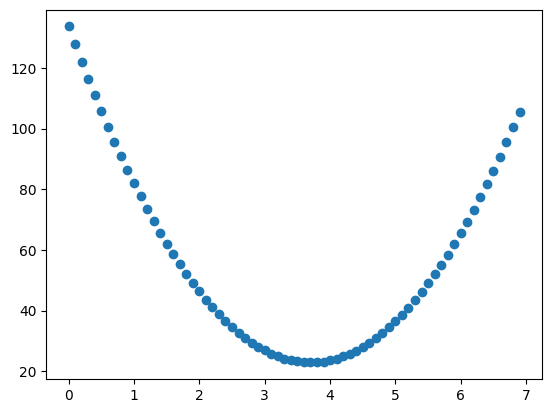

In [48]:
np.random.seed(123)
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))

best_m = None
best_b = None
min_mse = float('inf')
b = 0
mNew = []
mseNew = []

for m in np.arange(0, 7, 0.1):
        y_pred = m * x + b
        mse = np.mean((y - y_pred) ** 2)
        mNew.append(m)
        mseNew.append(mse)
        if mse < min_mse:
            min_mse = mse
            best_m = m
            best_b = b
plt.scatter(mNew, mseNew)

print("Mejor: f(x) = {:.2f}x + {:.2f}".format(best_m, best_b))
lineaMejor = 3.70 * x + 0
# print(lineaMejor)
mseMejor = np.mean((lineaMejor - y) ** 2)
print("MSE para la Mejor Línea:", mseMejor)



In [49]:
import plotly.graph_objs as go
np.random.seed(123)
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))

best_m = None
best_b = None
min_mse = float('inf')

m_values = np.arange(0, 7, 0.1)
b_values = np.arange(0, 7, 0.1)
mse_values = np.zeros((len(m_values), len(b_values)))

for i, m in enumerate(m_values):
    for j, b in enumerate(b_values):
        y_pred = m * x + b
        mse = np.mean((y - y_pred) ** 2)
        mse_values[i, j] = mse
        if mse < min_mse:
            min_mse = mse
            best_m = m
            best_b = b

print("Mejor: f(x) = {:.2f}x + {:.2f}".format(best_m, best_b))
lineaMejor = 3.30 * x + 1.30
# print(lineaMejor)
mseMejor = np.mean((lineaMejor - y) ** 2)
print("MSE para la Mejor Línea:", mseMejor)
fig = go.Figure(data=[go.Surface(x=m_values, y=b_values, z=mse_values)])
fig.update_layout(title='MSE vs. m and b', scene=dict(xaxis_title='m', yaxis_title='b', zaxis_title='MSE'))
fig.show()

Mejor: f(x) = 3.30x + 1.30
MSE para la Mejor Línea: 22.44170209239717


In [50]:
np.random.seed(123)
x = np.arange(0, 5, 0.1)
y = 3 * x + 2 + np.random.normal(0, 4, len(x))

best_m = None
best_b = None
min_mse = float('inf')

m_values = np.arange(0, 7, 0.1)
b_values = np.arange(0, 7, 0.1)
mse_values = np.zeros((len(m_values), len(b_values)))

for i, m in enumerate(m_values):
    for j, b in enumerate(b_values):
        y_pred = m * x + b
        mse = np.mean((y - y_pred) ** 2)
        mse_values[i, j] = mse
        if mse < min_mse:
            min_mse = mse
            best_m = m
            best_b = b

print("Mejor: f(x) = {:.2f}x + {:.2f}".format(best_m, best_b))
lineaMejor = 3.30 * x + 1.30
# print(lineaMejor)
mseMejor = np.mean((lineaMejor - y) ** 2)
print("MSE para la Mejor Línea:", mseMejor)

# Generate data for the scatter plot
x_best = np.linspace(0, 5, 100)
y_best = 3.30 * x_best + 1.30
z_best = np.full_like(x_best, mseMejor)

Mejor: f(x) = 3.30x + 1.30
MSE para la Mejor Línea: 22.44170209239717


In [51]:
fig = go.Figure(data=[go.Surface(x=m_values, y=b_values, z=mse_values)])
fig.update_layout(title='MSE vs. m and b', scene=dict(xaxis_title='m', yaxis_title='b', zaxis_title='MSE'))
fig.add_trace(go.Scatter3d(x=x_best, y=y_best, z=z_best, mode='markers', marker=dict(size=5, color='red')))
fig.show()